# Assignmet 7A - Hasanat Hasan
## Problem 1 (100 points): Thermal diffusion in the Earth’s crust.
### Heat Equation:
$$
\frac{\partial T}{\partial t} = D \frac{\partial^2 T}{\partial x^2}
$$
### Taylor Expansions:
$$
T(t+h,x) \approx T(t,x) + h\frac{\partial T}{\partial t}\\
$$
$$
\frac{\partial^2 T}{\partial x^2} \approx \frac{ T(t,x+a) -2T(t,x) + T(t,x-a) }{a^2} 
$$
$$
T(t+h,x) \approx T(t,x) + hD\frac{ T(t,x+a) -2T(t,x) + T(t,x-a) }{a^2} 
$$


# Utilities


In [97]:
import numpy as np

def FTCSM(matrix_grid: np.ndarray,
          diffusion_constant: float,
          position_step: float,
          time_step: float
          ):
    '''
    Solves the diffusion equation using the Forward-Time Centered-Space Method (FTCS):
    T(t+h,x) \approx T(t,x) + hD\frac{ T(t,x+a) -2T(t,x) + T(t,x-a) }{a^2} 
    '''
    # extract number of time steps 
    time, _ = matrix_grid.shape

    # calculate the time-evolution of temperature
    for t in range(0,time - 1):
        matrix_grid[t + 1, 1:-1] = (
            matrix_grid[t, 1:-1]
            + (time_step * diffusion_constant) / (position_step**2)
            * (matrix_grid[t, 2:] - 2 * matrix_grid[t, 1:-1] + matrix_grid[t, :-2])
        )

    return matrix_grid

def initial_temp(matrix_grid: np.ndarray,
                times_array: np.ndarray,
                depth: int,
                tau: int,
                T_surf: float,
                T_deep: float):

    
    # Spatial step size for arbitrary discretization
    _, position = matrix_grid.shape
    dx = depth / (position -1 ) 

    # Helper function to for temperature at time t   
    def temperature_at_time(times_array: np.ndarray):
        A = 10 
        B = 12   
        pi = np.pi
        Tsurf_through_time = np.zeros((len(times_array)))
        for i,time in enumerate(times_array):
            Tsurf_through_time[i] = A + B*np.sin(2*pi*(time)/tau)
        return Tsurf_through_time
    
    # setting boundary conditions: 
    Tsurf_array = temperature_at_time(times_array).T
    matrix_grid[:,0] = Tsurf_array
    matrix_grid[:,-1] = 11*np.ones((len(Tsurf_array))) 
    
    # calculating temperature at each postion
    for x in range(position):
        position_x = x * dx  # Calculate the actual position
        matrix_grid[0, x] = T_surf + (position_x / depth) * (T_deep - T_surf)  
    return matrix_grid



time step: 0.005
position step: 1.0
stability condition 0.0136986301369863


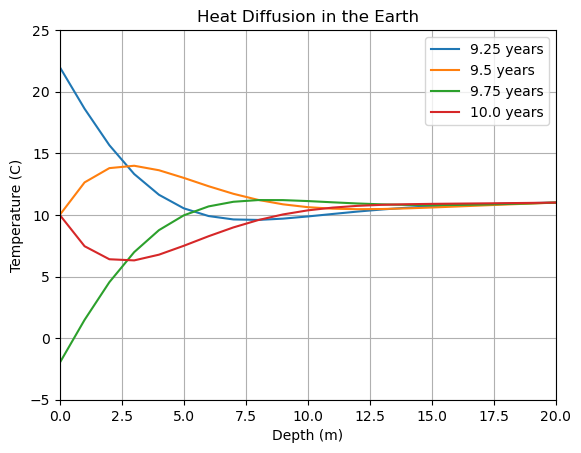

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# initialize constants:
initial_Tsurf = 10
initial_Tdeep = 11
diffusion_constant = (0.1) / (1/365)

# time steps:
tau = 1 #365
num_days = 1*365
total_time =  10 #num_days 
time_divisions= 2000
dt = total_time/time_divisions
print("time step:",dt)

# postion steps:
depth = 20 # 20
position_divisions = 20
dx = depth/position_divisions
print("position step:", dx)

# stability check:
stability_cond = (dx**2/(2*diffusion_constant))
print("stability condition",stability_cond)
if dt > stability_cond:
    print("Time step exceeds stability condition. Reduce time step for stability.")

# Generate the grid
positions = np.arange(0, depth+dx, dx)
time_vals = np.arange(0, total_time+dt, dt) 
zeros_matrix  = np.zeros((len(time_vals),len(positions)))
intial_temp_matrix = initial_temp(zeros_matrix,time_vals,depth, tau, initial_Tsurf, initial_Tdeep)

# solve:
temperatures_matrix = FTCSM(intial_temp_matrix,  diffusion_constant, dx, dt)
# final_temp = temperatures_matrix[-1,:]

conversion_factors = [0.925, 0.95, 0.975 ,1]
for factors in conversion_factors:
    elapsed_time = time_divisions*factors*dt
    index = int((factors / 0.005) * 10)
    temp_profile = temperatures_matrix[index,:]
    plt.plot(positions,temp_profile, label=f"{elapsed_time} years")
plt.title("Heat Diffusion in the Earth")
plt.ylabel("Temperature (C)")
plt.xlabel("Depth (m)")
plt.ylim(-5,25)
plt.xlim(0,depth)
plt.legend()
plt.grid()
plt.show()


